# EDA for PetFinder6000

##### Last updated as of: 23 May 2023, 17:00:00

## 1. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

## 2. Load Data

In [2]:
users = pd.read_csv('../../data/users_6-10-2023.csv', header=0)
cats = pd.read_csv('../../data/cats_6-10-2023.csv', header=0)
interactions = pd.read_csv('../../data/interactions_6-10-2023.csv', header=0)

## 2a. Process Data

### i. Process Users

In [3]:
users.head(15)

,id,username,A_gender,A_primarycolor,A_agegroup,A_energy,A_attention,A_sweetspicy,A_firstcat,A_othercats,A_otherdogs,A_kids,A_employment,A_homeownership,A_allergies,A_adoptionfee,createdAt,updatedAt
0,8b1aa3c3-162f-4717-a9f5-d895ec52f2a4,Chai Chai,No preference,No preference,No preference,No preference,No preference,Anything is nice,1,-1,1,1,Working Full Time,Self-Owned,-1,1,2023-05-17T09:04:07.762Z,2023-05-17T09:04:07.762Z
1,9b6bed1a-6d10-40eb-b320-7d12ff653ff9,bob the builder,No preference,"No preference,Ginger","No preference,Kitten",Chill,Independent,Anything is nice,1,-1,-1,1,Working Full Time,Staying with Parents,1,1,2023-05-24T10:40:33.910Z,2023-05-24T10:40:33.910Z
2,bfd0401f-ab32-4de6-af44-745c940b5f64,Robertaa,Male,No preference,No preference,Chill,Independent,Anything is nice,1,-1,1,-1,Working Full Time,Self-Owned,-1,-1,2023-06-02T04:53:24.202Z,2023-06-02T04:53:24.202Z
3,c0d37cae-c1fc-4aca-9135-0e1d4f222a99,Raiken01,No preference,No preference,No preference,Chill,Independent,Anything is nice,1,-1,-1,-1,Working Full Time,Staying with Parents,-1,-1,2023-05-18T06:51:55.017Z,2023-05-18T06:51:55.017Z
4,4e663992-2176-4a8f-a879-b802ef8d88bb,JeanneTan,No preference,No preference,"No preference,Adult",Chill,No preference,Some spice,1,1,-1,-1,Working Full Time,Self-Owned,-1,1,2023-05-18T05:50:12.410Z,2023-05-18T05:50:12.410Z
5,eaf7de2b-dde2-4eca-9172-a720201a3c90,Nrokhade,No preference,No preference,No preference,No preference,No preference,Anything is nice,1,-1,-1,-1,Working Full Time,Rented with Landlord Consent,-1,-1,2023-06-01T12:37:37.252Z,2023-06-01T12:37:37.252Z
6,762d7d01-7887-4150-83ca-5c28512ac812,hitman76,No preference,No preference,No preference,No preference,No preference,Anything is nice,1,-1,-1,1,Student,Rented with Landlord Consent,-1,1,2023-06-01T12:33:59.509Z,2023-06-01T12:33:59.509Z
7,029f1e2a-d68b-4801-869f-f422e925ae3d,oinkboink,No preference,No preference,Kitten,No preference,No preference,Anything is nice,1,-1,-1,-1,Student,Staying with Parents,-1,-1,2023-05-24T13:59:56.030Z,2023-05-24T13:59:56.030Z
8,f3ff9f65-68ff-4333-a442-27d58f75d5ee,neoyiwee,No preference,No preference,No preference,Chill,An attention seeker,All sweet,1,-1,-1,-1,Student,Staying with Parents,-1,1,2023-06-09T09:29:26.623Z,2023-06-09T09:29:26.623Z
9,e3d44c57-27ef-4c7c-8746-19af91f88b8c,Gg.com.sg,No preference,No preference,"Kitten,Juvenile",Chill,Independent,All sweet,1,-1,-1,1,Student,Staying with Parents,-1,1,2023-05-19T00:24:54.669Z,2023-05-19T00:24:54.669Z


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               107 non-null    object
 1   username         107 non-null    object
 2   A_gender         107 non-null    object
 3   A_primarycolor   107 non-null    object
 4   A_agegroup       107 non-null    object
 5   A_energy         107 non-null    object
 6   A_attention      107 non-null    object
 7   A_sweetspicy     107 non-null    object
 8   A_firstcat       107 non-null    int64 
 9   A_othercats      107 non-null    int64 
 10  A_otherdogs      107 non-null    int64 
 11  A_kids           107 non-null    int64 
 12  A_employment     107 non-null    object
 13  A_homeownership  107 non-null    object
 14  A_allergies      107 non-null    int64 
 15  A_adoptionfee    107 non-null    int64 
 16  createdAt        107 non-null    object
 17  updatedAt        107 non-null    ob

In [5]:
# rename headers
cl_users = users.rename(columns={'A_gender': 'gender',
                              'A_primarycolor': 'primary_color',
                              'A_agegroup': 'age_group',
                              'A_energy': 'energy_level',
                              'A_attention': 'attention_need',
                              'A_sweetspicy': 'personality',
                              'A_firstcat': 'is_first_cat',
                              'A_othercats': 'has_other_cats',
                              'A_otherdogs': 'good_with_other_dogs',
                              'A_kids': 'good_with_kids',
                              'A_employment': 'employment',
                              'A_homeownership': 'home_ownership',
                              'A_allergies': 'has_allergies',
                              'A_adoptionfee': 'agree_to_fee',
                              'createdAt': 'created_at',
                              'updatedAt': 'updated_at',
                              })

In [6]:
# clean multi-select columns with No Preference options (age, color)

def clean_multi_select(row):
    arr = row.split(',')
    if (len(arr) > 1) and ('No preference' in arr):
        arr.remove('No preference')
    return arr

cl_users['age_group'] = cl_users['age_group'].map(lambda choice: clean_multi_select(choice))
cl_users['primary_color'] = cl_users['primary_color'].map(lambda choice: clean_multi_select(choice))

In [7]:
# split columns with list (age, color)
age_groups = cl_users['age_group'].explode().unique().tolist()
split_age_groups = cl_users['age_group'].map(lambda row: ','.join([str(age in row) for age in age_groups]))
new_age_columns = split_age_groups.str.split(',', expand=True)
new_age_columns = new_age_columns.applymap(lambda val: (val == 'True'))
new_age_columns = new_age_columns.astype('bool')

pattern = re.compile(r'\s|/')
# new_age_columns.columns = [f'age_{pattern.sub("_", age).lower()}' for age in age_groups]
cl_users[[f'age_{pattern.sub("_", age).lower()}' for age in age_groups]] = new_age_columns
cl_users = cl_users.drop('age_group', axis=1)

color_groups = cl_users['primary_color'].explode().unique().tolist()
split_color_groups = cl_users['primary_color'].map(lambda row: ','.join([str(color in row) for color in color_groups]))
new_color_columns = split_color_groups.str.split(',', expand=True)
new_color_columns = new_color_columns.applymap(lambda val: (val == 'True'))
new_color_columns = new_color_columns.astype('bool')

cl_users[[f'primary_color_{pattern.sub("_", color).lower()}' for color in color_groups]] = new_color_columns
cl_users = cl_users.drop('primary_color', axis=1)

In [8]:
# # convert int booleans to actual booleans (is_first_cat, has_other_cats, good_with_other_dogs, good_with_kids, has_allergies, agree_to_fee)
cl_users['is_first_cat'] = cl_users['is_first_cat'].map(lambda val: (val == 1))
cl_users['has_other_cats'] = cl_users['has_other_cats'].map(lambda val: (val == 1))
cl_users['good_with_other_dogs'] = cl_users['good_with_other_dogs'].map(lambda val: (val == 1))
cl_users['good_with_kids'] = cl_users['good_with_kids'].map(lambda val: (val == 1))
cl_users['has_allergies'] = cl_users['has_allergies'].map(lambda val: (val == 1))
cl_users['agree_to_fee'] = cl_users['agree_to_fee'].map(lambda val: (val == 1))

In [9]:
# convert types
cl_users = cl_users.astype({'gender': 'category',
                          'energy_level': 'category',
                          'attention_need': 'category',
                          'personality': 'category',
                          'is_first_cat': 'bool',
                          'has_other_cats': 'bool',
                          'good_with_other_dogs': 'bool',
                          'good_with_kids': 'bool',
                          'employment': 'category',
                          'home_ownership': 'category',
                          'has_allergies': 'bool',
                          'agree_to_fee': 'bool',
                          })

cl_users['created_at'] = pd.to_datetime(cl_users['created_at'])
cl_users['updated_at'] = pd.to_datetime(cl_users['updated_at'])

In [10]:
cl_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   id                           107 non-null    object             
 1   username                     107 non-null    object             
 2   gender                       107 non-null    category           
 3   energy_level                 107 non-null    category           
 4   attention_need               107 non-null    category           
 5   personality                  107 non-null    category           
 6   is_first_cat                 107 non-null    bool               
 7   has_other_cats               107 non-null    bool               
 8   good_with_other_dogs         107 non-null    bool               
 9   good_with_kids               107 non-null    bool               
 10  employment                   107 non-null    categ

In [11]:
cl_users.head()

,id,username,gender,energy_level,attention_need,personality,is_first_cat,has_other_cats,good_with_other_dogs,good_with_kids,...,age_adult,age_juvenile,age_senior,primary_color_no_preference,primary_color_ginger,primary_color_black,primary_color_white,primary_color_calico_tortie,primary_color_others,primary_color_tabby
0,8b1aa3c3-162f-4717-a9f5-d895ec52f2a4,Chai Chai,No preference,No preference,No preference,Anything is nice,True,False,True,True,...,False,False,False,True,False,False,False,False,False,False
1,9b6bed1a-6d10-40eb-b320-7d12ff653ff9,bob the builder,No preference,Chill,Independent,Anything is nice,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,bfd0401f-ab32-4de6-af44-745c940b5f64,Robertaa,Male,Chill,Independent,Anything is nice,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,c0d37cae-c1fc-4aca-9135-0e1d4f222a99,Raiken01,No preference,Chill,Independent,Anything is nice,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,4e663992-2176-4a8f-a879-b802ef8d88bb,JeanneTan,No preference,Chill,No preference,Some spice,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False


### ii. Process Cats

In [12]:
cats.head()

,id,cws_id,image_url,name,age_months,C_gender,breed,C_primarycolor,description,details,...,C_firstcat,C_othercats,C_otherdogs,C_kids,C_employment,C_homeownership,C_allergies,C_adoptionfee,createdAt,updatedAt
0,bd8c1b25-bb4b-4d0d-ac37-3d6799d885f9,1681491353-164,https://petfinder6000images.s3.ap-southeast-1....,Michael Ming,36,Male,Domestic Short Hair,Tabby,"shy, spicy","Feb 2022\nOne night late 2021, Ming’s ex-owner...",...,0,0,0,0,student,parents,no allergies,yes,2023-05-15T02:51:33.203Z,2023-05-15T02:51:33.203Z
1,c822a63a-ad76-4302-af0a-ef17f4ae3680,1681491768-348,https://petfinder6000images.s3.ap-southeast-1....,Muffin,18,Male,Domestic Short Hair,Others,"loving, sweet, likes to be held",Cat Available for Adoption\n\n\n\nMuffin\nMale...,...,0,0,0,0,working full time,owned,no allergies,no preference,2023-05-15T02:51:44.549Z,2023-05-15T02:51:44.549Z
2,feee6a5f-d978-4337-9ba5-dfa1c9faeb46,1681491178-86,https://petfinder6000images.s3.ap-southeast-1....,Chubby and Snowy looking for a new home,108,Male,Domestic Short Hair,Black,loving,Name: Chubby and Snowy\nAge: 9 years old\nBree...,...,0,1,0,0,working part time,rental with landlord’s consent,no allergies,yes,2023-05-15T02:51:25.990Z,2023-05-15T02:51:25.990Z
3,993c537d-c4e3-4343-854a-b36068506d8e,1681491761-345,https://petfinder6000images.s3.ap-southeast-1....,Tomoe,48,Female,Domestic Short Hair,Tabby,"loving, sweet",Tomoe\n\nAge: about 4 years old\n\nGender: fem...,...,0,-1,0,0,working full time,owned,no preference,yes,2023-05-15T02:51:44.221Z,2023-05-15T02:51:44.221Z
4,eb11adfa-ba0a-4b83-8989-b78c9ecc1a21,1681491518-238,https://petfinder6000images.s3.ap-southeast-1....,Samantha,48,Female,Domestic Short Hair,White,"talkative, loving, sweet",She literally fell into fosterer ‘s hands by c...,...,0,-1,0,0,working full time,no preference,no allergies,no preference,2023-05-15T02:51:14.022Z,2023-05-15T02:51:14.022Z


In [13]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               404 non-null    object
 1   cws_id           404 non-null    object
 2   image_url        404 non-null    object
 3   name             404 non-null    object
 4   age_months       404 non-null    int64 
 5   C_gender         404 non-null    object
 6   breed            404 non-null    object
 7   C_primarycolor   404 non-null    object
 8   description      369 non-null    object
 9   details          404 non-null    object
 10  playful          404 non-null    bool  
 11  active           404 non-null    bool  
 12  curious          404 non-null    bool  
 13  talkative        404 non-null    bool  
 14  quiet            404 non-null    bool  
 15  loving           404 non-null    bool  
 16  sweet            404 non-null    bool  
 17  likes_held       404 non-null    bo

In [14]:
# rename headers
cl_cats = cats.rename(columns={'C_gender': 'gender',
                              'C_primarycolor': 'primary_color',
                              'C_agegroup': 'age_group',
                              'C_energy': 'energy_level',
                              'C_attention': 'attention_need',
                              'C_sweetspicy': 'personality',
                              'C_firstcat': 'good_first_cat',
                              'C_othercats': 'good_with_other_cats',
                              'C_otherdogs': 'good_with_other_dogs',
                              'C_kids': 'good_with_kids',
                              'C_employment': 'preferred_employment',
                              'C_homeownership': 'preferred_home_ownership',
                              'C_allergies': 'good_with_allergies',
                              'C_adoptionfee': 'require_fee',
                              'createdAt': 'created_at',
                              'updatedAt': 'updated_at',
                              })

In [15]:
# fill attention and personality columns as neutral
cl_cats['attention_need'] = cl_cats['attention_need'].fillna('neutral')
cl_cats['personality'] = cl_cats['personality'].fillna('neutral')

# fill empty description with no description available
cl_cats['description'] = cl_cats['description'].fillna('no description available')

In [16]:
# map integers in categorical columns
def map_categorical(val):
    if val == 1:
        return 'yes'
    elif val == -1:
        return 'no'
    else:
        return 'neutral'

cl_cats['good_first_cat'] = cl_cats['good_first_cat'].map(lambda val: map_categorical(val))
cl_cats['good_with_other_cats'] = cl_cats['good_with_other_cats'].map(lambda val: map_categorical(val))
cl_cats['good_with_other_dogs'] = cl_cats['good_with_other_dogs'].map(lambda val: map_categorical(val))
cl_cats['good_with_kids'] = cl_cats['good_with_kids'].map(lambda val: map_categorical(val))

In [17]:
# convert types
cl_cats = cl_cats.astype({'gender': 'category',
                          'breed': 'category',
                          'primary_color': 'category',
                          'age_group': 'category',
                          'energy_level': 'category',
                          'attention_need': 'category',
                          'personality': 'category',
                          'good_first_cat': 'category',
                          'good_with_other_cats': 'category',
                          'good_with_other_dogs': 'category',
                          'good_with_kids': 'category',
                          'preferred_employment': 'category',
                          'preferred_home_ownership': 'category',
                          'good_with_allergies': 'category',
                          'require_fee': 'category',
                          })

cl_cats['created_at'] = pd.to_datetime(cl_cats['created_at'])
cl_cats['updated_at'] = pd.to_datetime(cl_cats['updated_at'])

In [18]:
cl_cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        404 non-null    object             
 1   cws_id                    404 non-null    object             
 2   image_url                 404 non-null    object             
 3   name                      404 non-null    object             
 4   age_months                404 non-null    int64              
 5   gender                    404 non-null    category           
 6   breed                     404 non-null    category           
 7   primary_color             404 non-null    category           
 8   description               404 non-null    object             
 9   details                   404 non-null    object             
 10  playful                   404 non-null    bool               
 11  active             

### iii. Process Interactions

In [19]:
interactions.head()

,id,catID,userID,rating,like,dwell_time_ms,click,createdAt,updatedAt
0,a02ad399-01b5-45d3-9529-ba54b0e74e62,a9eebe65-702f-4b34-bc2e-42153078e1d9,0cf2ab4c-91a8-46d5-821c-576de66585c5,NaN,False,3578,True,2023-05-17T14:31:39.037Z,2023-05-17T14:31:39.037Z
1,d43b865f-c13d-4ee0-a990-ca8d7184bb8d,3d2e4ecc-d9e0-48c9-b851-ebe8fdd9ede3,c5ab4a57-839d-40c9-ad03-70072da2d078,NaN,True,718,False,2023-05-22T15:35:17.324Z,2023-05-22T15:35:17.324Z
2,64fceb4a-9fbf-48e4-9bf0-478d292caf4b,20106676-a088-44e3-b23e-286b6e37f1d5,c5ab4a57-839d-40c9-ad03-70072da2d078,NaN,True,783,False,2023-05-22T15:35:39.907Z,2023-05-22T15:35:39.907Z
3,27d6292a-2584-4aaf-b016-c504c484eb54,2b87337b-1179-42c8-b423-c0ec34bb6833,081f358f-9624-468a-b6ef-f9b9fad2b3b3,NaN,True,1574,False,2023-05-17T08:44:22.617Z,2023-05-17T08:44:22.617Z
4,5004d90f-1b34-4c4c-8400-3fba142ec079,54197c51-1b76-4854-9349-e2e2d55bd71d,b2fe504c-8b80-4f50-ab07-12b6e7ff8cd2,NaN,False,869,True,2023-06-09T11:30:34.791Z,2023-06-09T11:30:34.791Z


In [20]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4841 non-null   object 
 1   catID          4841 non-null   object 
 2   userID         4841 non-null   object 
 3   rating         0 non-null      float64
 4   like           4841 non-null   bool   
 5   dwell_time_ms  4841 non-null   int64  
 6   click          4841 non-null   bool   
 7   createdAt      4841 non-null   object 
 8   updatedAt      4841 non-null   object 
dtypes: bool(2), float64(1), int64(1), object(5)
memory usage: 274.3+ KB


In [21]:
interactions = interactions.drop('rating', axis=1)

In [22]:
# rename headers
cl_interactions = interactions.rename(columns={
                              'createdAt': 'created_at',
                              'updatedAt': 'updated_at',
                              })

# convert types
cl_interactions['created_at'] = pd.to_datetime(cl_interactions['created_at'])
cl_interactions['updated_at'] = pd.to_datetime(cl_interactions['updated_at'])

In [23]:
cl_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             4841 non-null   object             
 1   catID          4841 non-null   object             
 2   userID         4841 non-null   object             
 3   like           4841 non-null   bool               
 4   dwell_time_ms  4841 non-null   int64              
 5   click          4841 non-null   bool               
 6   created_at     4841 non-null   datetime64[ns, UTC]
 7   updated_at     4841 non-null   datetime64[ns, UTC]
dtypes: bool(2), datetime64[ns, UTC](2), int64(1), object(3)
memory usage: 236.5+ KB


## 3. Data Exploration

### 3a. Users

In [24]:
user_pref = ['gender', 'energy_level', 'attention_need', 'personality', 'is_first_cat', 'has_other_cats', 'good_with_other_dogs', 'good_with_kids', 'employment', 'home_ownership', 'has_allergies', 'agree_to_fee']

#### User preferences

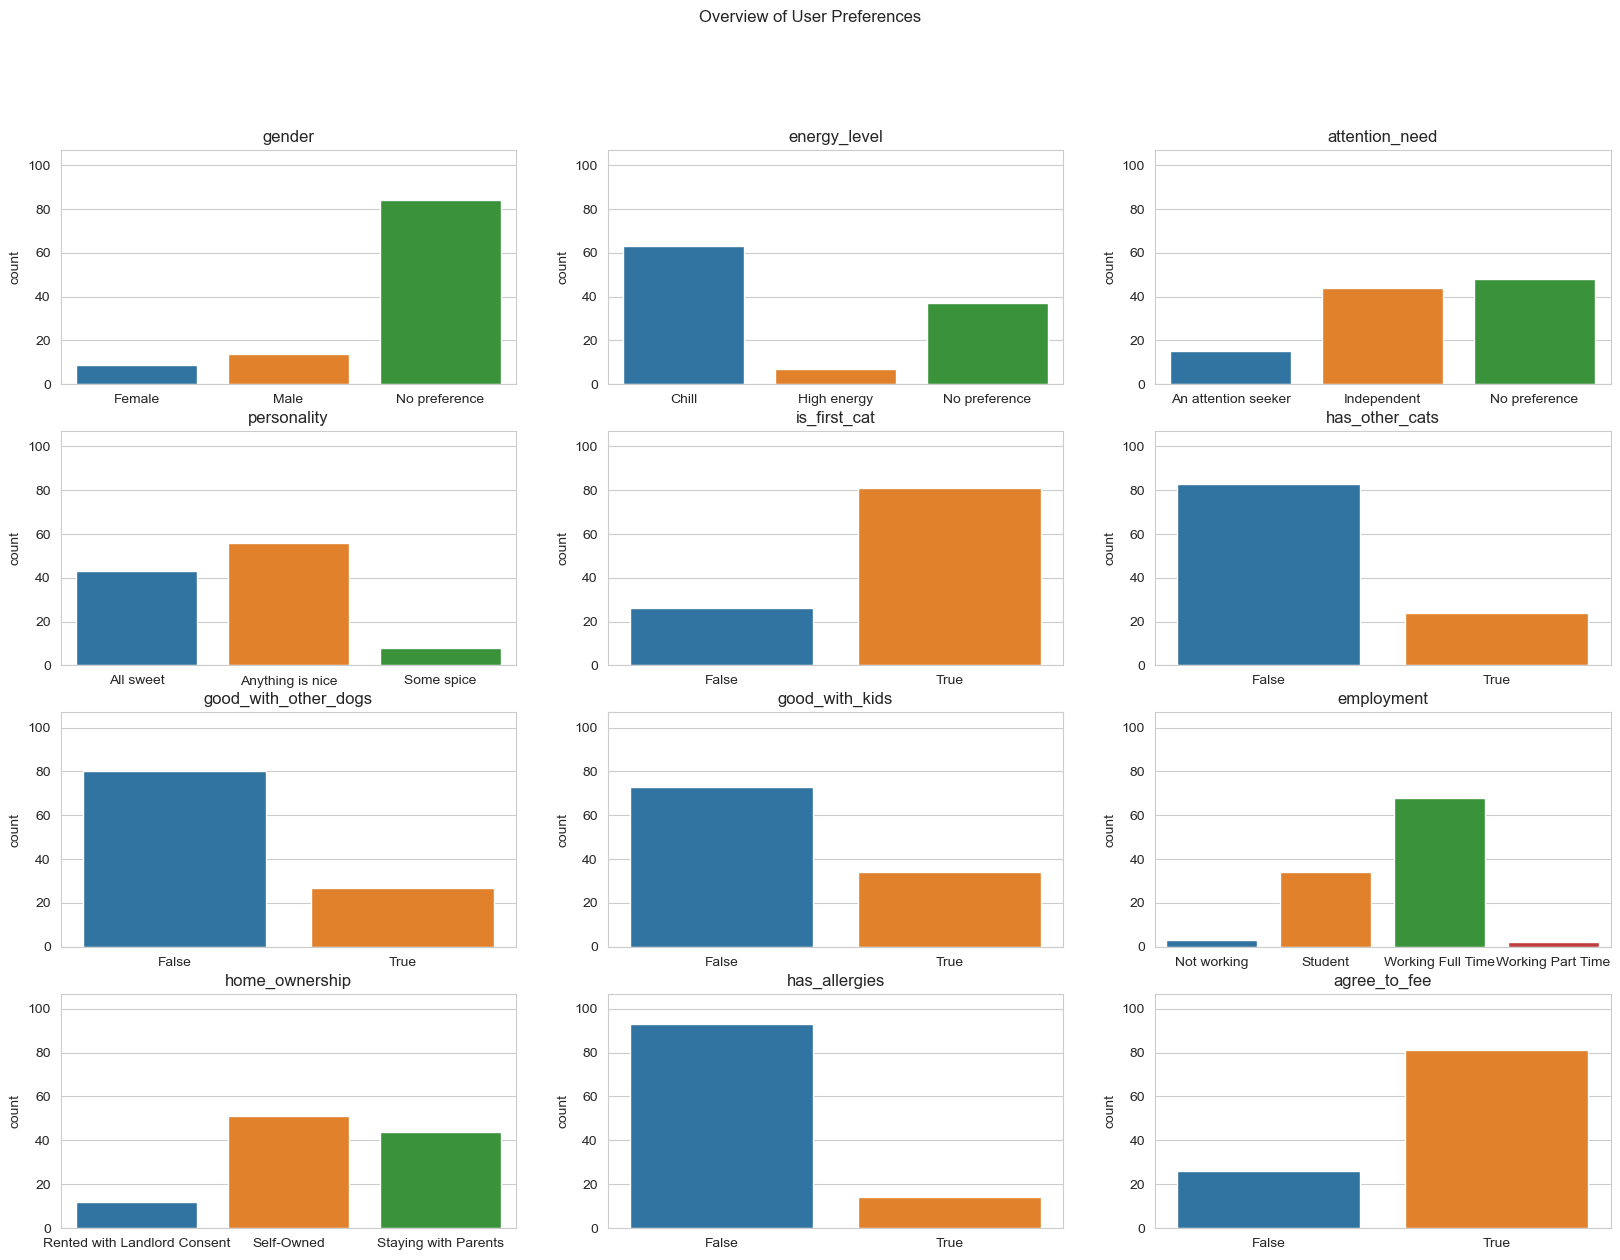

In [25]:
fig = plt.figure(figsize=(20, 14))
fig.tight_layout()
axes = fig.subplots(ncols=3, nrows=math.ceil(len(user_pref) / 3))

fig.suptitle('Overview of User Preferences')
for ax, pref in zip(axes.reshape(-1), user_pref):
    pt = sns.countplot(x=pref, data=cl_users, ax=ax)
    pt.set(ylim=(0, cl_users['id'].nunique()))
    pt.set(xlabel=None)
    ax.set_title(pref)

Text(0.5, 0.98, 'Distribution of Age Group Preference')

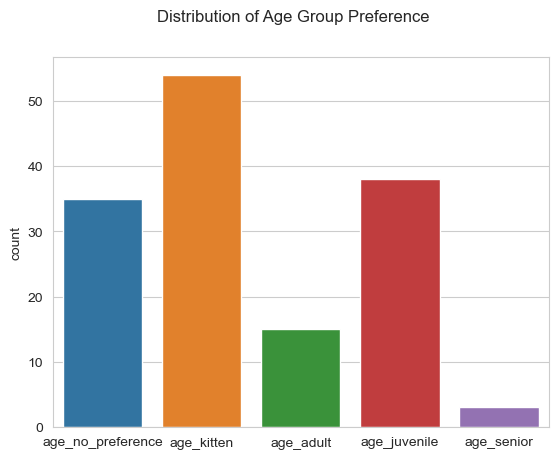

In [26]:
mask = cl_users.columns.str.startswith('age_')
age_columns = pd.melt(cl_users.loc[:,mask])

fig = plt.figure()
ax = fig.subplots(1,1)
pt = sns.countplot(data=age_columns[age_columns['value']==True], x='variable', ax=ax)
pt.set(xlabel=None)
fig.suptitle('Distribution of Age Group Preference')

Text(0.5, 0.98, 'Distribution of Primary Color Preference')

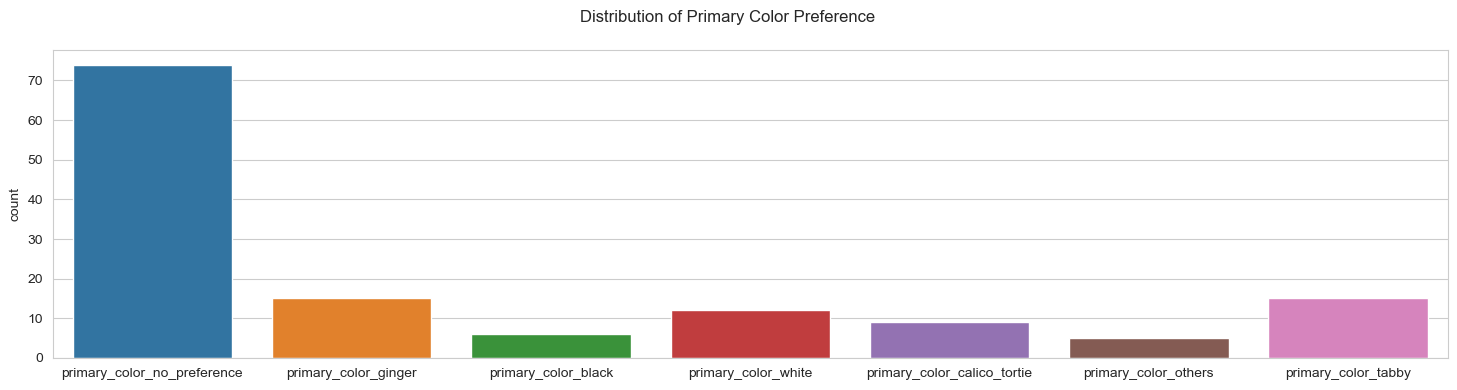

In [27]:
mask = cl_users.columns.str.startswith('primary_color_')
color_columns = pd.melt(cl_users.loc[:,mask])

fig = plt.figure(figsize=(18, 4))
ax = fig.subplots(1,1)
pt = sns.countplot(data=color_columns[color_columns['value']==True], x='variable',ax=ax)
pt.set(xlabel=None)
fig.suptitle('Distribution of Primary Color Preference')

### 3b. Cats

In [28]:
cats_desc = ['gender', 'breed',
       'primary_color', 'age_group',
       'energy_level', 'attention_need', 'personality',
       'good_first_cat', 'good_with_other_cats', 'good_with_other_dogs',
       'good_with_kids', 'preferred_employment', 'preferred_home_ownership',
       'good_with_allergies', 'require_fee']

cats_personality = ['playful', 'active',
       'curious', 'talkative', 'quiet', 'loving', 'sweet', 'likes_held',
       'friendly', 'shy', 'spicy', 'loves_attention']

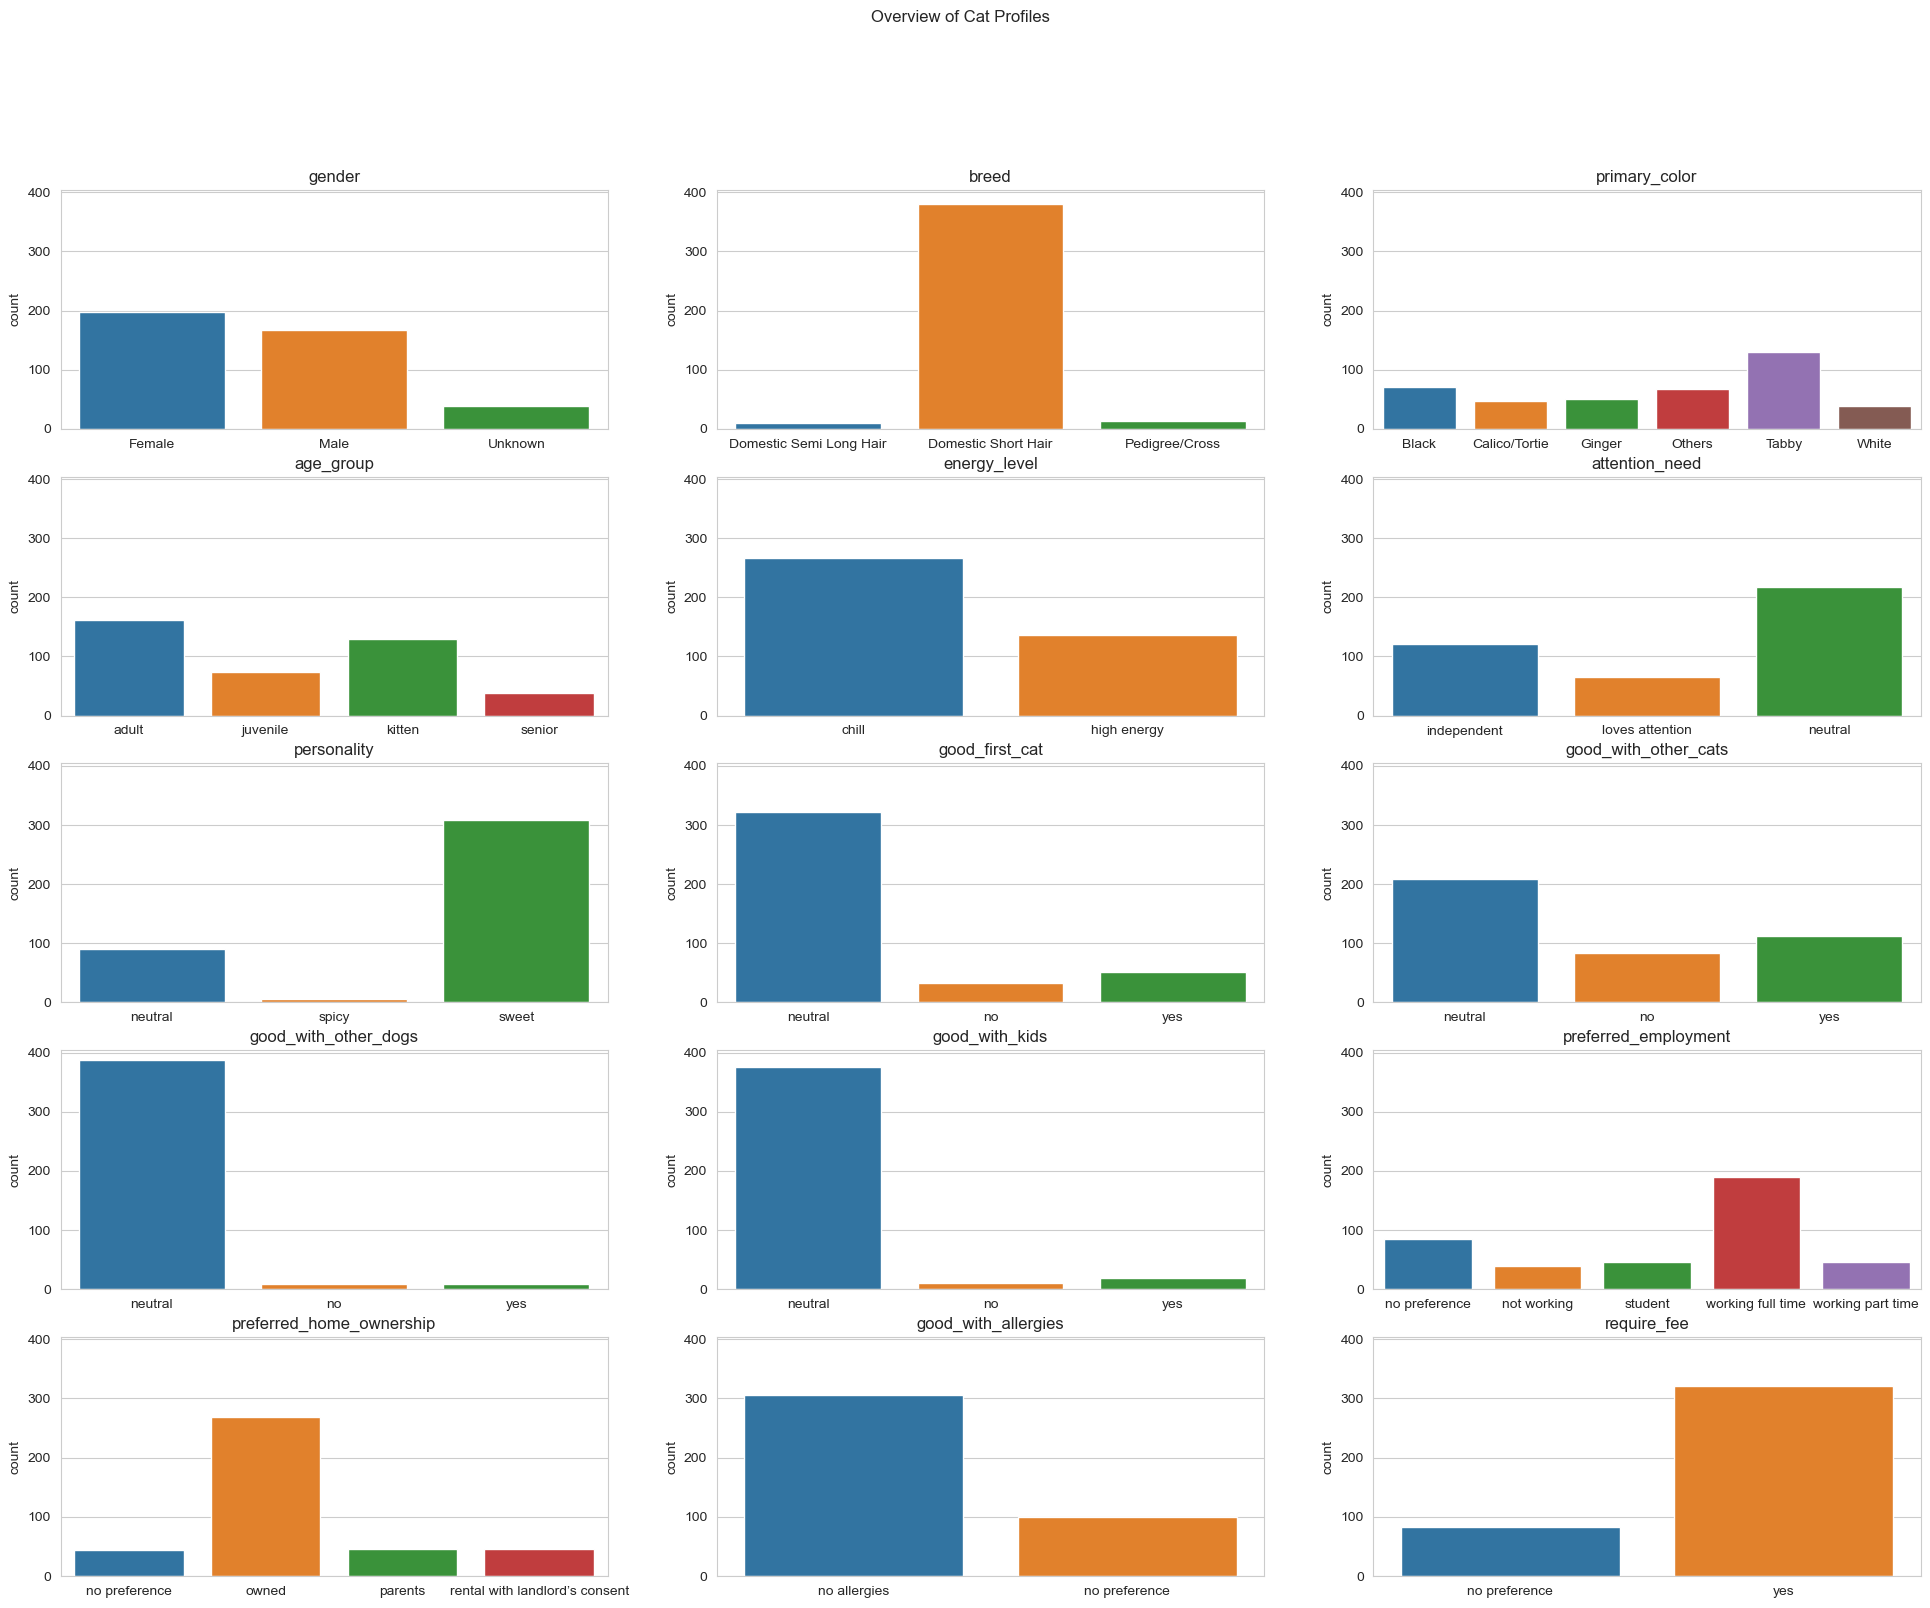

In [29]:
fig = plt.figure(figsize=(24, 18))
fig.tight_layout()
axes = fig.subplots(ncols=3, nrows=math.ceil(len(cats_desc) / 3))

fig.suptitle('Overview of Cat Profiles')
for ax, pref in zip(axes.reshape(-1), cats_desc):
    pt = sns.countplot(x=pref, data=cl_cats, ax=ax)
    pt.set(ylim=(0, cl_cats['id'].nunique()))
    pt.set(xlabel=None)
    ax.set_title(pref)

Text(0.5, 0.98, 'Distribution of Detailed Personality')

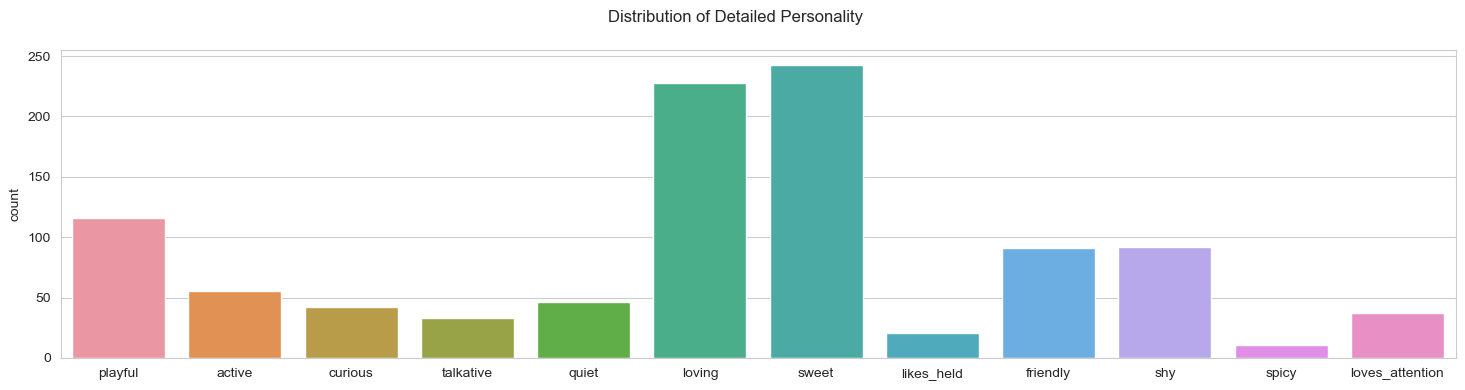

In [30]:
mask = cl_cats.columns.isin(cats_personality)
personality_columns = pd.melt(cl_cats.loc[:,mask])

fig = plt.figure(figsize=(18, 4))
ax = fig.subplots(1,1)
pt = sns.countplot(data=personality_columns[personality_columns['value']==True], x='variable',ax=ax)
pt.set(xlabel=None)
fig.suptitle('Distribution of Detailed Personality')

### 3c. User-Cat Interactions

In [31]:
cl_interactions.columns

Index(['id', 'catID', 'userID', 'like', 'dwell_time_ms', 'click', 'created_at',
       'updated_at'],
      dtype='object')

In [32]:
cl_interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   id             4841 non-null   object             
 1   catID          4841 non-null   object             
 2   userID         4841 non-null   object             
 3   like           4841 non-null   bool               
 4   dwell_time_ms  4841 non-null   int64              
 5   click          4841 non-null   bool               
 6   created_at     4841 non-null   datetime64[ns, UTC]
 7   updated_at     4841 non-null   datetime64[ns, UTC]
dtypes: bool(2), datetime64[ns, UTC](2), int64(1), object(3)
memory usage: 236.5+ KB


In [33]:
print(f'# users with interactions: {cl_interactions["userID"].nunique()}')
print(f'# unique cats interacted with: {cl_interactions["catID"].nunique()}')

# users with interactions: 104
# unique cats interacted with: 403


In [34]:
duplicated_user_cats = cl_interactions[cl_interactions.duplicated(['userID', 'catID'])]
print(f"# of duplicates: {duplicated_user_cats.size}")

# of duplicates: 0


#### i. Sparsity

In [35]:
def calc_sparsity(n_users, n_items, data, title):
    n_ratings = len(data)
    rating_matrix_size = n_users * n_items
    sparsity = 1 - n_ratings / rating_matrix_size

    print(f"Data Type: {title}")
    print("=" * 40)
    print(f"Number of users: {n_users}")
    print(f"Number of items: {n_items}")
    print(f"Number of available interactions: {n_ratings}")
    print(f"Number of all possible interactions: {rating_matrix_size}")
    print("-" * 40)
    print(f"SPARSITY: {sparsity * 100.0:.2f}%")
    print(" " * 40)

In [36]:
calc_sparsity(cl_users['id'].nunique(), cl_cats['id'].nunique(), cl_interactions, 'Likes')
calc_sparsity(cl_users['id'].nunique(), cl_cats['id'].nunique(), cl_interactions[cl_interactions['click'] == True], 'Expanded Profile')

Data Type: Likes
Number of users: 107
Number of items: 404
Number of available interactions: 4841
Number of all possible interactions: 43228
----------------------------------------
SPARSITY: 88.80%
                                        
Data Type: Expanded Profile
Number of users: 107
Number of items: 404
Number of available interactions: 2098
Number of all possible interactions: 43228
----------------------------------------
SPARSITY: 95.15%
                                        


#### ii. User-Cat Interactions Distribution

Text(0.5, 0.98, 'Likes')

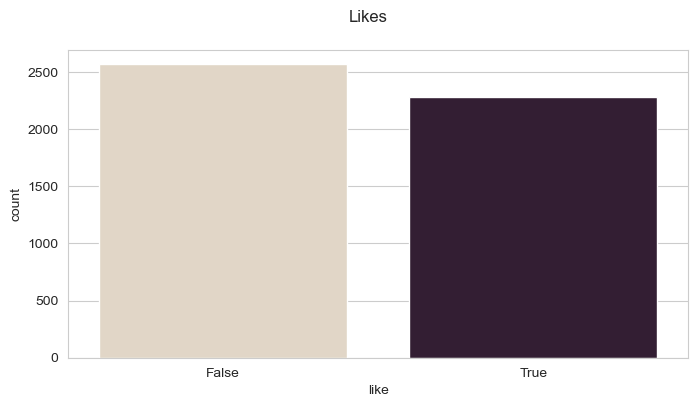

In [37]:
fig = plt.figure(figsize=(8, 4))
axes = fig.subplots(nrows=1, ncols=1)

sns.countplot(x="like", data=cl_interactions, palette="ch:.25", ax=axes)
fig.suptitle('Likes', fontsize='large')

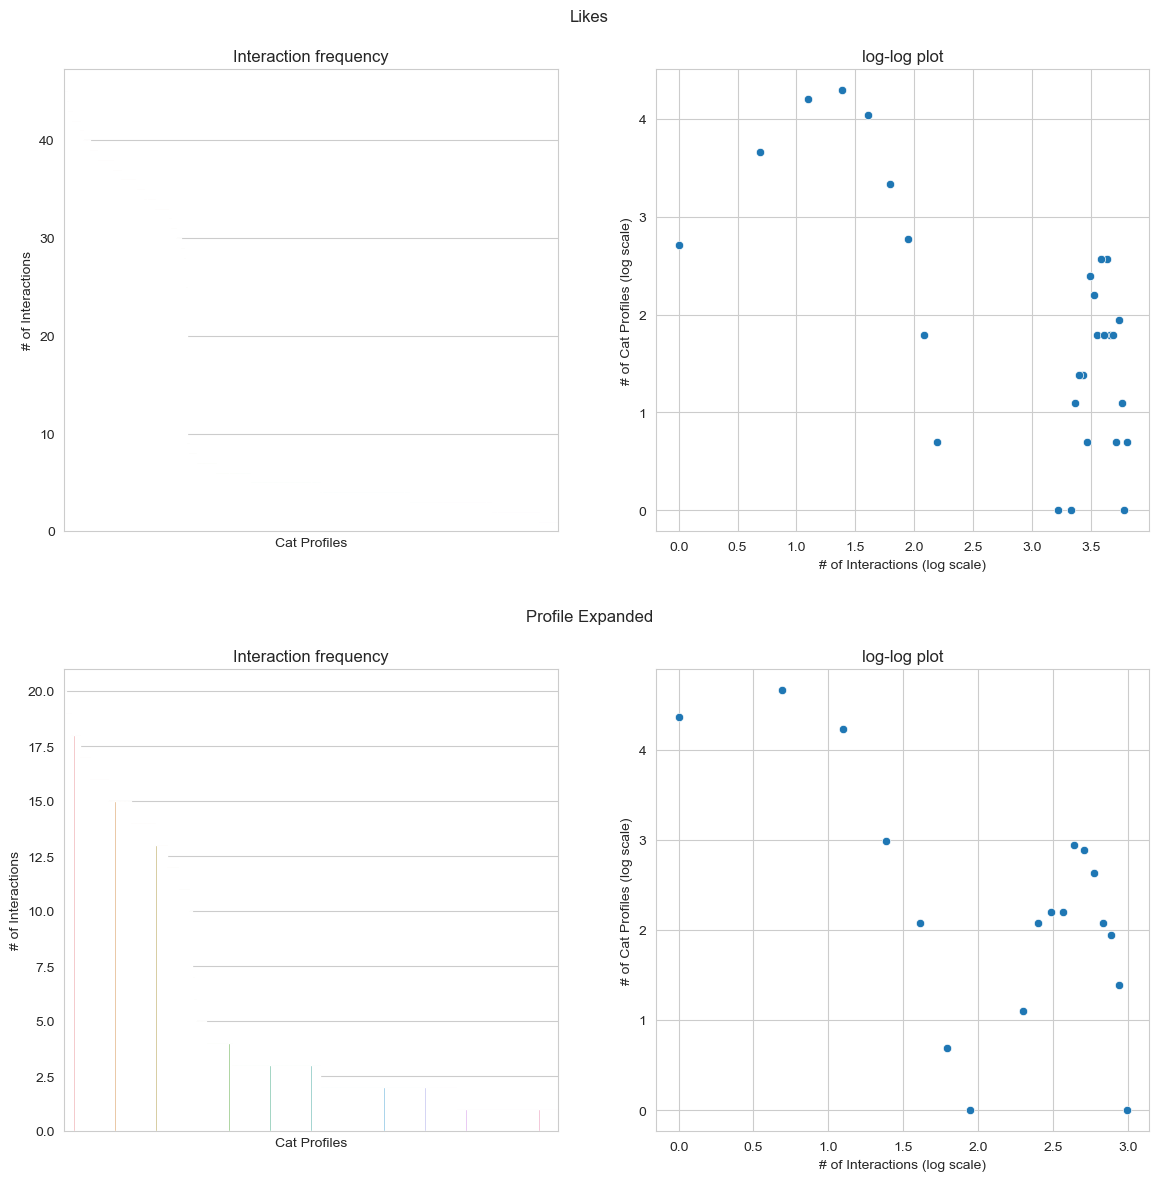

In [38]:
fig = plt.figure(figsize=(14, 12))
subfig = fig.subfigures(nrows=2, ncols=1)

def plotFrequency(subfig, data, title):
    axes = subfig.subplots(nrows=1, ncols=2)
    subfig.suptitle(title, fontsize='large')

    sns.countplot(data=data, x="catID", order = data["catID"].value_counts().index, ax=axes[0])
    axes[0].set_xticks([])
    axes[0].set(title="Interaction frequency",
                xlabel="Cat Profiles",
                ylabel="# of Interactions")

    count = data.groupby("catID")["userID"].nunique().sort_values(ascending=False)
    count = count.value_counts()
    sns.scatterplot(x=np.log(count.index), y=np.log(count.values), ax=axes[1])
    axes[1].set(title="log-log plot", xlabel="# of Interactions (log scale)", ylabel="# of Cat Profiles (log scale)")

plotFrequency(subfig[0], cl_interactions, 'Likes')
plotFrequency(subfig[1], cl_interactions[cl_interactions['click'] == True], 'Profile Expanded')
# plotFrequency(subfig[2], data, 'Dwell Time')

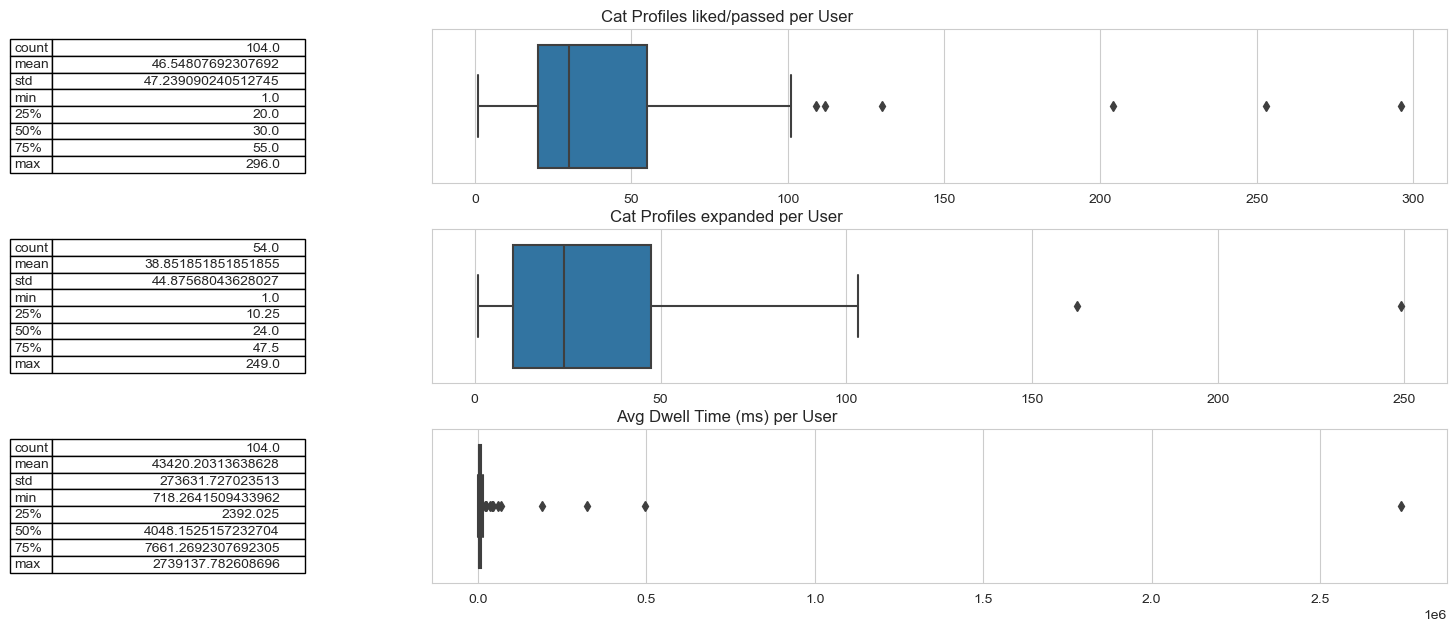

In [39]:
fig = plt.figure(figsize=(18, 6))
subfig = fig.subfigures(nrows=3, ncols=1)

def plot_rating_count(subfig, data, title):
    axes = subfig.subplots(nrows=1, ncols=2, width_ratios=[1, 4])

    desc = data.describe().astype(str)
    axes[0].axis('off')
    axes[0].axis('tight')
    axes[0].table(cellText=np.atleast_2d(desc.values).T, rowLabels=desc.index.tolist(), loc='center')

    sns.boxplot(x=data.values, ax=axes[1])
    subfig.suptitle(title, fontsize='large')

likes = cl_interactions.value_counts('userID')
plot_rating_count(subfig[0], likes, 'Cat Profiles liked/passed per User')

clicks = cl_interactions[cl_interactions['click'] == True].value_counts('userID')
plot_rating_count(subfig[1], clicks, 'Cat Profiles expanded per User')

dwell_time = cl_interactions.groupby('userID')['dwell_time_ms'].mean()
plot_rating_count(subfig[2], dwell_time, 'Avg Dwell Time (ms) per User')

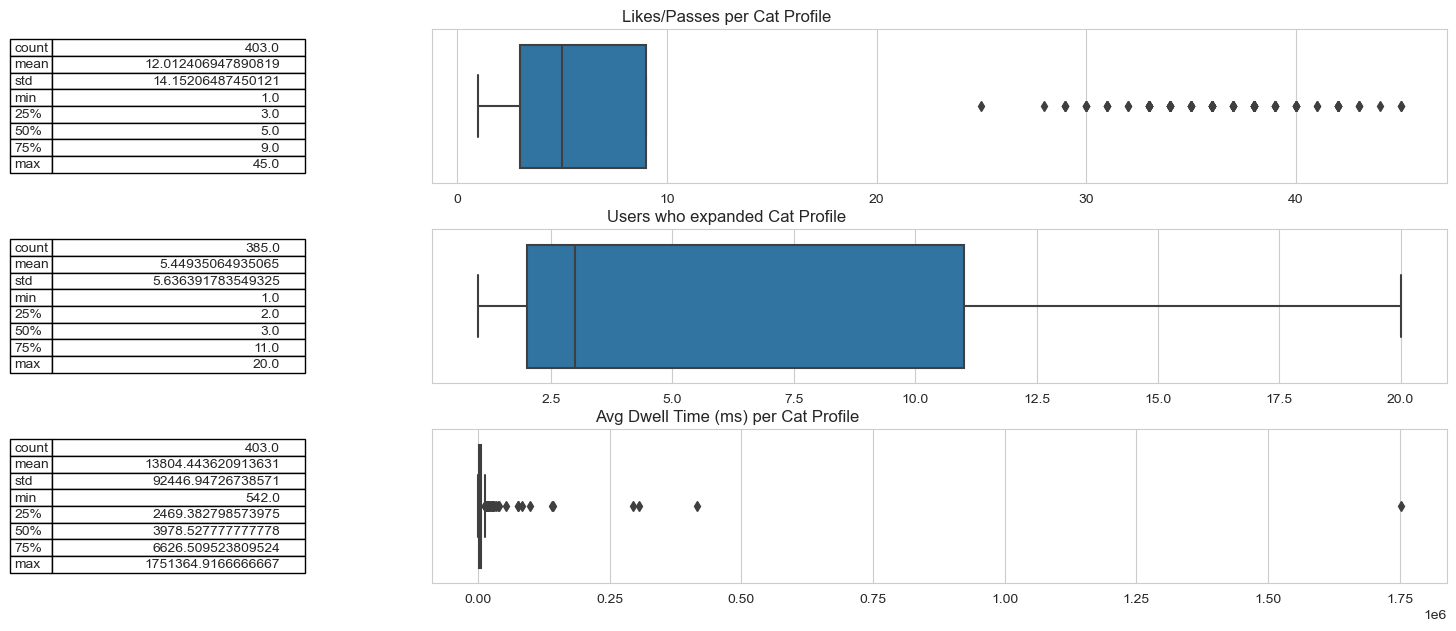

In [40]:
fig = plt.figure(figsize=(18, 6))
subfig = fig.subfigures(nrows=3, ncols=1)

likes = cl_interactions.value_counts('catID')
plot_rating_count(subfig[0], likes, 'Likes/Passes per Cat Profile')

clicks = cl_interactions[cl_interactions['click'] == True].value_counts('catID')
plot_rating_count(subfig[1], clicks, 'Users who expanded Cat Profile')

dwell_time = cl_interactions.groupby('catID')['dwell_time_ms'].mean()
plot_rating_count(subfig[2], dwell_time, 'Avg Dwell Time (ms) per Cat Profile')